In [215]:
import numpy as np
import pandas as pd
import io
#import html5lib
#import lxml
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
# Retrieve the webpage as a string
# df_list = pd.read_html("http://en.wikipedia.org/wiki/List_of_countries_by_population")

In [216]:
df_unemp_AnnArbor = pd.read_csv('ANNAunemployment.csv').dropna()
df_unemp_AnnArbor.tail()

,DATE,ANNA426URN
351,2019-04-01,2.5
352,2019-05-01,2.9
353,2019-06-01,3.5
354,2019-07-01,4.2
355,2019-08-01,3.3


In [217]:
df_unemp_Detroit = pd.read_csv('DETROIT_WARREN_LIVONIA_unemployment.csv').dropna()
df_unemp_Detroit.tail()

,DATE,DETR826URN
351,2019-04-01,3.9
352,2019-05-01,4.3
353,2019-06-01,4.5
354,2019-07-01,5.3
355,2019-08-01,4.5


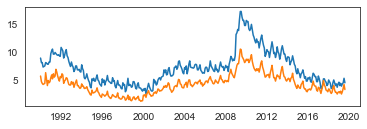

In [218]:
plt.figure()
plt.subplot(2, 1, 1)

observation_dates = list(map(pd.to_datetime, df_unemp_Detroit['DATE']))
plt.plot(observation_dates, df_unemp_Detroit['DETR826URN'])
plt.plot(observation_dates, df_unemp_AnnArbor['ANNA426URN'])

Text(0.5, 1.0, 'Unemployment comparison between Detroit and Ann Arbor')

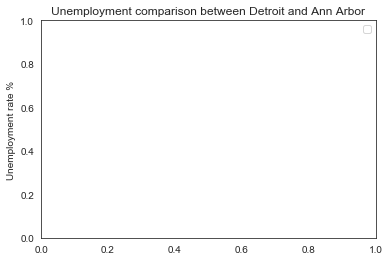

In [265]:
plt.ylabel("Unemployment rate %")
plt.legend(["Detroit", "Ann Arbor"])
plt.title("Unemployment comparison between Detroit and Ann Arbor")

Text(0.5, 0, 'Unemployment rate')

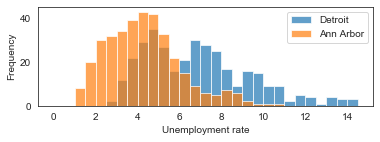

In [243]:
plt.subplot(2, 1, 2)

plt.hist(df_unemp_Detroit['DETR826URN'], alpha=0.7, bins=np.arange(0,15,0.5), label='Detroit');
plt.hist(df_unemp_AnnArbor['ANNA426URN'], alpha=0.7, bins=np.arange(0,15,0.5), label='Ann Arbor');
plt.legend();

plt.gca().set_ylabel('Frequency')
plt.gca().set_xlabel('Unemployment rate')

In [244]:
stats.ttest_ind(df_unemp_Detroit['DETR826URN'],df_unemp_AnnArbor['ANNA426URN'])


Ttest_indResult(statistic=15.502438487758468, pvalue=6.682088454390347e-47)

In [245]:
df_Detroit_personal_income = pd.read_csv("DETROIT_WARREN_LIVONIA_personalincome_percapita.csv").dropna()


In [246]:
df_Detroit_personal_income.tail()


,DATE,DETR826PCPI
12,2013-01-01,42725
13,2014-01-01,44966
14,2015-01-01,47799
15,2016-01-01,49179
16,2017-01-01,50863


In [247]:
df_AnnArbor_personal_income = pd.read_csv("ANNARBOR_personalincome_percapita.csv").dropna()
df_AnnArbor_personal_income.tail()

,DATE,ANNA426PCPI
12,2013-01-01,47764
13,2014-01-01,49642
14,2015-01-01,52303
15,2016-01-01,54322
16,2017-01-01,56348


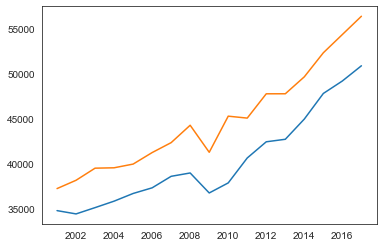

In [248]:
plt.figure()
observation_dates = list(map(pd.to_datetime, df_AnnArbor_personal_income['DATE']))
plt.plot(observation_dates, df_Detroit_personal_income['DETR826PCPI'])
plt.plot(observation_dates, df_AnnArbor_personal_income['ANNA426PCPI'])


Text(0.5, 1.0, 'Personal Income comparison between Detroit and Ann Arbor')

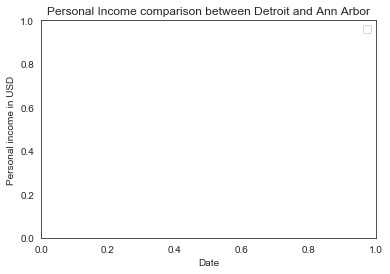

In [249]:
plt.xlabel("Date")
plt.ylabel("Personal income in USD")
plt.legend(["Detroit", "Ann Arbor"])
plt.title("Personal Income comparison between Detroit and Ann Arbor")

In [250]:
df_Detroit_personal_income["Change"] = df_Detroit_personal_income.DETR826PCPI.pct_change().dropna()

df_Detroit_personal_income = df_Detroit_personal_income[df_Detroit_personal_income.Change.notnull()]
df_Detroit_personal_income.head()

,DATE,DETR826PCPI,Change
1,2002-01-01,34461,-0.010481
2,2003-01-01,35158,0.020226
3,2004-01-01,35873,0.020337
4,2005-01-01,36725,0.023750
5,2006-01-01,37350,0.017018


In [251]:
df_AnnArbor_personal_income["Change"] = df_AnnArbor_personal_income.ANNA426PCPI.pct_change()
df_AnnArbor_personal_income = df_AnnArbor_personal_income[df_AnnArbor_personal_income.Change.notnull()]
df_AnnArbor_personal_income.head()

,DATE,ANNA426PCPI,Change
1,2002-01-01,38186,0.024687
2,2003-01-01,39526,0.035091
3,2004-01-01,39568,0.001063
4,2005-01-01,39979,0.010387
5,2006-01-01,41254,0.031892


Text(0.5, 1.0, 'Histogram on personal income growth Detroit and Ann Arbor')

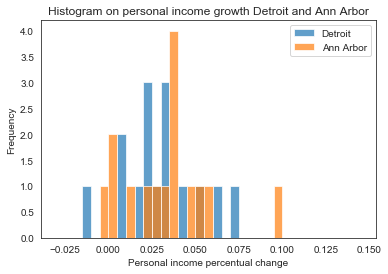

In [252]:
plt.figure()
plt.hist(df_Detroit_personal_income['Change'], alpha=0.7, bins=np.arange(-0.03,0.15,0.005), label='Detroit');
plt.hist(df_AnnArbor_personal_income['Change'], alpha=0.7, bins=np.arange(-0.03,0.15, 0.005), label='Ann Arbor');
plt.legend();

plt.gca().set_ylabel('Frequency')
plt.gca().set_xlabel('Personal income percentual change')
plt.gca().set_title('Histogram on personal income growth Detroit and Ann Arbor')


In [253]:
stats.ttest_ind(df_Detroit_personal_income['Change'],df_AnnArbor_personal_income['Change'])


Ttest_indResult(statistic=-0.20442270914089633, pvalue=0.8394037347243162)

In [254]:
df_merged = pd.merge(df_AnnArbor_personal_income, df_unemp_AnnArbor, left_on=['DATE'],
              right_on=['DATE'],
              how='inner')

df_merged.head()

,DATE,ANNA426PCPI,Change,ANNA426URN
0,2002-01-01,38186,0.024687,3.9
1,2003-01-01,39526,0.035091,3.8
2,2004-01-01,39568,0.001063,4.2
3,2005-01-01,39979,0.010387,4.5
4,2006-01-01,41254,0.031892,4.6


In [255]:
Y = df_merged['Change']
X = df_merged['ANNA426URN']
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=np.arange(0,15,0.5), density = True)
s = side_histogram.hist(Y, bins=np.arange(-0.05,0.09,0.0025), orientation='horizontal', density = True)
side_histogram.invert_xaxis()

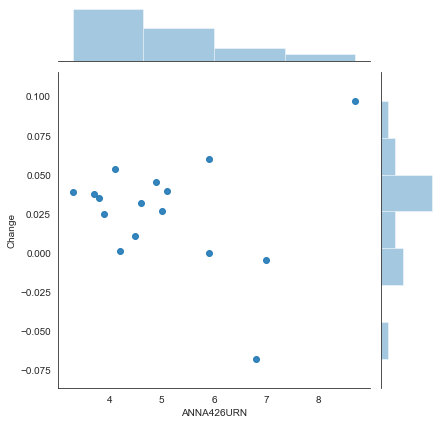

In [256]:
grid = sns.jointplot(X, Y, alpha=0.9);


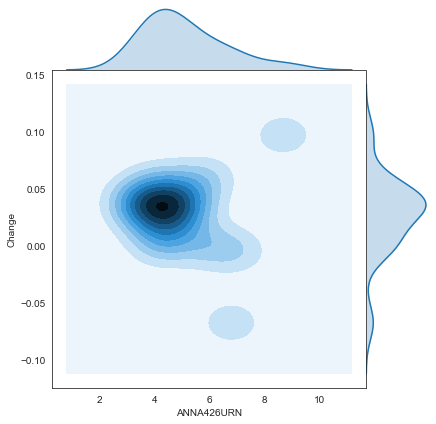

In [257]:
sns.set_style('white')

sns.jointplot(X, Y, kind='kde', space=0);

In [258]:
print (np.corrcoef(X,Y)[1,0])


-0.00958964005005003


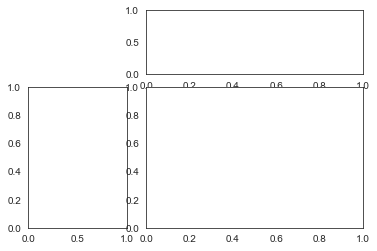

In [259]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])



In [260]:
df_merged = pd.merge(df_Detroit_personal_income, df_unemp_Detroit, left_on=['DATE'],
              right_on=['DATE'],
              how='inner')

df_merged.head()

,DATE,DETR826PCPI,Change,DETR826URN
0,2002-01-01,34461,-0.010481,6.8
1,2003-01-01,35158,0.020226,7.2
2,2004-01-01,35873,0.020337,7.2
3,2005-01-01,36725,0.023750,7.7
4,2006-01-01,37350,0.017018,7.1


In [261]:
Y = df_merged['Change']
X = df_merged['DETR826URN']
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=np.arange(0,15,0.5), density = True)
s = side_histogram.hist(Y, bins=np.arange(-0.05,0.09,0.0025), orientation='horizontal', density = True)
side_histogram.invert_xaxis()


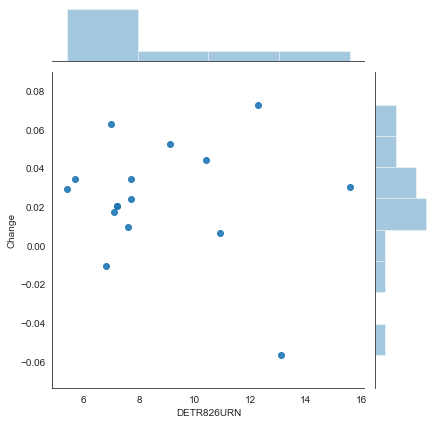

In [262]:
grid = sns.jointplot(X, Y, alpha=0.9);


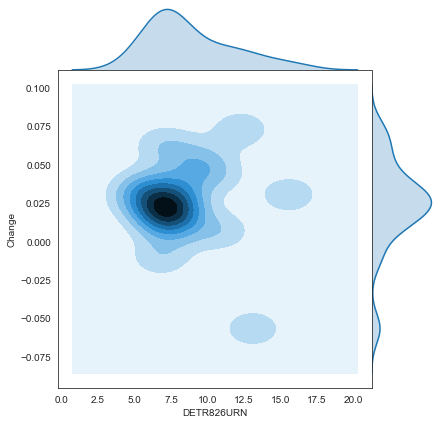

In [263]:
sns.set_style('white')

sns.jointplot(X, Y, kind='kde', space=0);

In [264]:
print (np.corrcoef(X,Y)[1,0])


-0.11423108143977902
